In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import statistics
import math
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import api_key

#import packages from alpha_vantage
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies


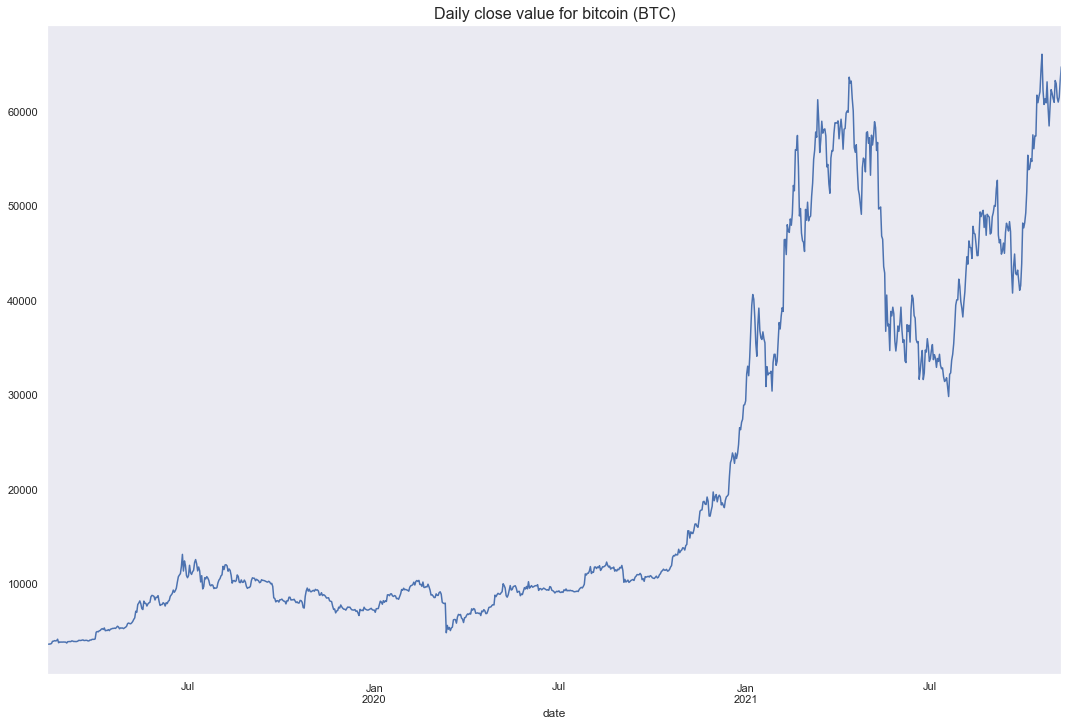

In [259]:
ccb = CryptoCurrencies(key=api_key, output_format='pandas')
b_data, b_meta_data = ccb.get_digital_currency_daily(symbol='BTC', market='USD')
b_data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)', fontsize=16)
plt.grid()
plt.show()
sns.set(rc={'figure.figsize':(15,10)});

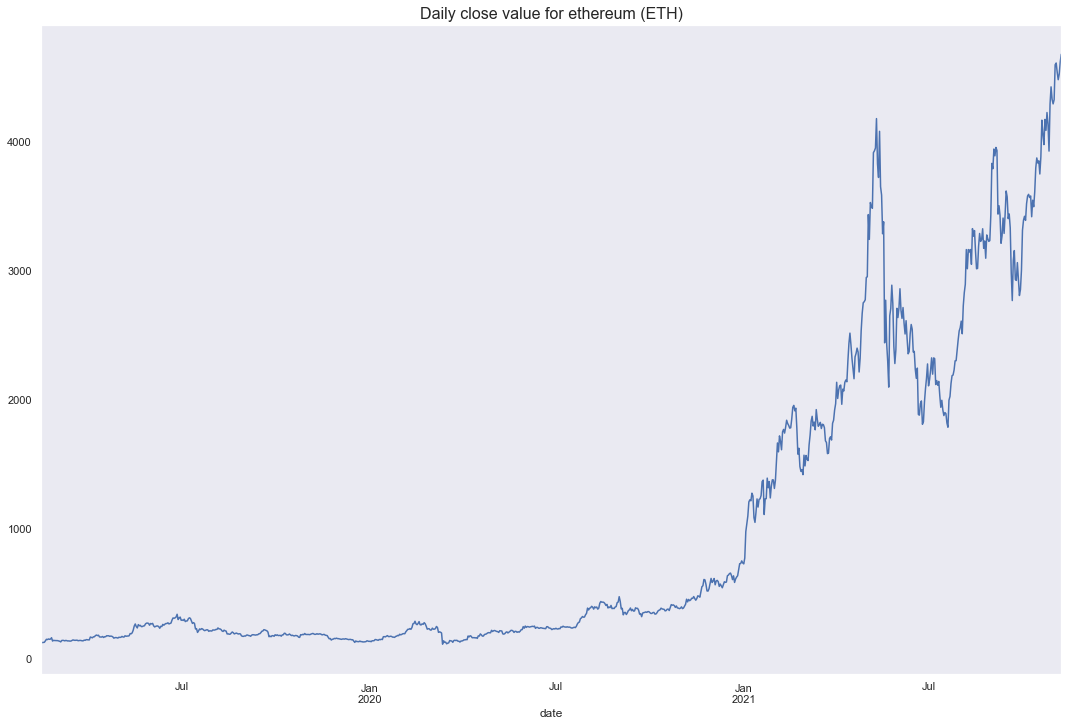

In [260]:
cce = CryptoCurrencies(key=api_key, output_format='pandas')
e_data, e_meta_data = cce.get_digital_currency_daily(symbol='ETH', market='USD')
e_data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for ethereum (ETH)', fontsize=16)
plt.grid()
plt.show()
sns.set(rc={'figure.figsize':(15,10)});

In [261]:
b_close = b_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])
e_close = e_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])

In [262]:
b_close = b_close.rename(columns = {'4b. close (USD)' : 'BTC (USD)'})

In [219]:
e_close = e_close.rename(columns = {'4b. close (USD)' : 'ETH (USD)'})

In [220]:
crypto_data = pd.concat([b_close, e_close], axis = 1)

In [221]:
crypto_data.head(1)

,BTC (USD),ETH (USD)
date,,
2021-11-08,64671.9,4671.34


In [222]:
crypto_data.tail(1)

,BTC (USD),ETH (USD)
date,,
2019-02-13,3609.4,121.86


In [223]:
crypto_data.corr()

,BTC (USD),ETH (USD)
BTC (USD),1.000000,0.921622
ETH (USD),0.921622,1.000000


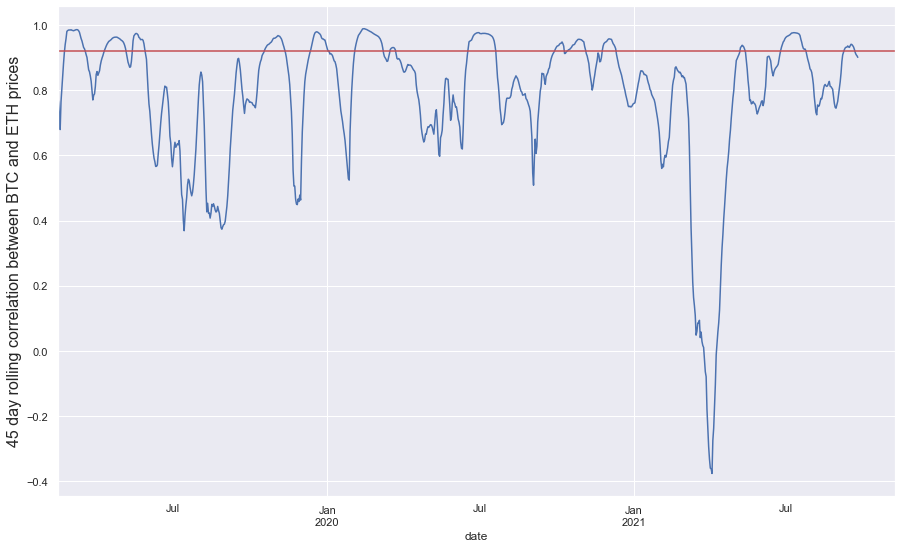

In [263]:
ax = crypto_data['BTC (USD)'].rolling(window = 45).corr(crypto_data['ETH (USD)']).plot(figsize = (15, 9))
ax.axhline(crypto_data.corr().iloc[0,1], c = 'r')
ax.set_ylabel('45 day rolling correlation between BTC and ETH prices', fontsize=16)
sns.set(rc={'figure.figsize':(15,10)});

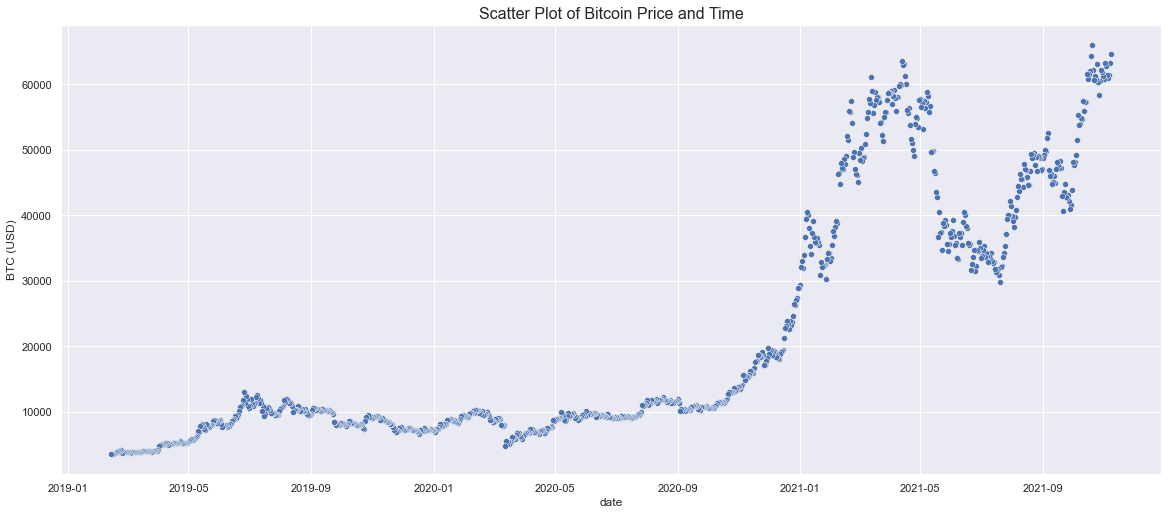

In [264]:
import seaborn as sns
sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.scatterplot(x="date", y='BTC (USD)', data=crypto_data)
plt.title('Scatter Plot of Bitcoin Price and Time', fontsize=16)
sns.set(rc={'figure.figsize':(15,10)});

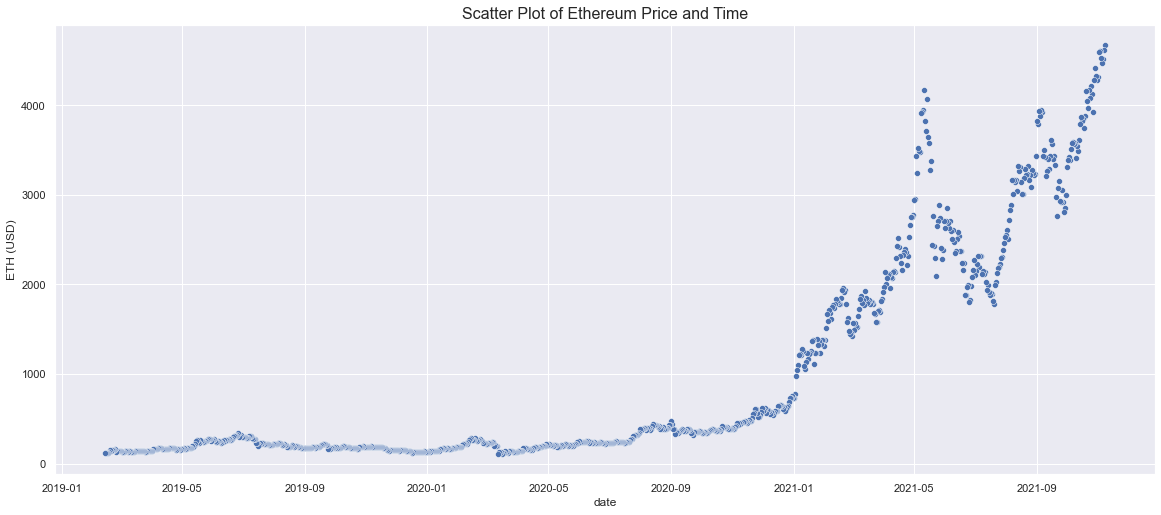

In [265]:
import seaborn as sns
sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.scatterplot(x="date", y='ETH (USD)', data=crypto_data)
plt.title('Scatter Plot of Ethereum Price and Time', fontsize=16)
sns.set(rc={'figure.figsize':(15,10)});

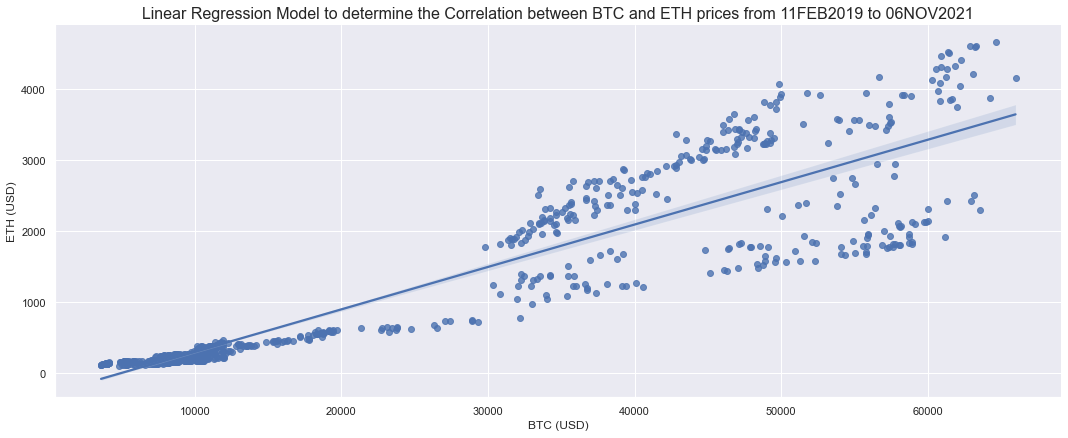

In [266]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.lmplot(x="BTC (USD)", y="ETH (USD)", data=crypto_data, height=6, aspect=2.5)
plt.title("Linear Regression Model to determine the Correlation between BTC and ETH prices from 11FEB2019 to 06NOV2021", fontsize=16);